# Welter issue #22
## Which spectrum was I using to make the famous Teff vs. Order plot?

Michael Gully-Santiago  
Monday, June 27, 2016  

Which 1?

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt

In [2]:
% matplotlib inline
% config InlineBackend.figure_format = 'retina'
import seaborn as sns
sns.set_context('notebook')

In [3]:
import h5py

In [4]:
import pandas as pd

### We need the meta data about the optical spectral orders 

In [5]:
start_wl = []
end_wl = []
center_wl = []
ord_name = []

for o in range(0, 34+1):
    f = h5py.File('../data/reduced/optical/LkCa4_ESPaDOnS_eo{:03d}.hdf5'.format(o), 'r')
    this_wl = (f['wls'][0] + f['wls'][-1])/2.0
    start_wl.append(f['wls'][0])
    end_wl.append(f['wls'][-1])
    center_wl.append(this_wl)
    ord_name.append('{:03d}'.format(o))
    f.close()

In [6]:
opt_ords = pd.DataFrame({"wl_start":start_wl, "wl_end":end_wl, "wl_center":center_wl, 
                         "number":range(0,34+1), "m_val":ord_name})
opt_ords.head()

,m_val,number,wl_center,wl_end,wl_start
0,000,0,5180.62500,5199.9292,5161.3208
1,001,1,5231.25700,5262.5311,5199.9829
2,002,2,5294.98655,5327.4005,5262.5726
3,003,3,5360.99580,5394.5496,5327.4420
4,004,4,5429.35055,5464.0826,5394.6185


In [11]:
opt_ords

,m_val,number,wl_center,wl_end,wl_start
0,000,0,5180.62500,5199.9292,5161.3208
1,001,1,5231.25700,5262.5311,5199.9829
2,002,2,5294.98655,5327.4005,5262.5726
3,003,3,5360.99580,5394.5496,5327.4420
4,004,4,5429.35055,5464.0826,5394.6185
5,005,5,5500.15715,5536.1810,5464.1333
6,006,6,5573.65050,5611.0803,5536.2207
7,007,7,5649.92550,5688.7048,5611.1462
8,008,8,5729.08110,5769.3994,5688.7628
9,009,9,5811.36870,5853.2635,5769.4739


There is technically no `m_val`, since we don't know the $m$ of the spectrograph.  But we will just use the relative order number, $o$, as $m$ for now.

In [12]:
o=21
f = h5py.File('../data/reduced/optical/LkCa4_ESPaDOnS_eo{:03d}.hdf5'.format(o), 'r')

In [13]:
list(f.keys())

['fls', 'masks', 'sigmas', 'wls']

In [26]:
tmp = f['wls']

In [28]:
orig_wl, orig_fl = f['wls'].value, f['fls'].value

In [29]:
f.close()

Read in all the raw files.

In [58]:
! ls -1 ../data/raw/optical/

LkCa4_tspec.fits
README
lkca4_07jan14.dat
lkca4_08jan14.dat
lkca4_09jan14.dat
lkca4_10jan14.dat
lkca4_14jan14.dat
lkca4_15jan14.dat
lkca4_16jan14.dat
lkca4_17jan14.dat
lkca4_18jan14.dat
lkca4_19jan14.dat
lkca4_20080121.dat
lkca4_20081230.dat
lkca4_20jan14a.dat
lkca4_20jan14b.dat
lkca4blue_20080121.dat
lkca4blue_20081230.dat


In [59]:
! head ../data/raw/optical/lkca4_08jan14.dat

       369.10297      5.52024
       369.10532      3.77908
       369.10767      2.59929
       369.11002   -0.0409353
       369.11237    -0.798713
       369.11472      4.09479
       369.11707      3.36449
       369.11942     -4.32258
       369.12177    -0.387621
       369.12411     -5.07386


|file | match?|
|---|---|
|lkca4_07jan14.dat| no|
|lkca4_08jan14.dat| no|
|lkca4_09jan14.dat| no| 
|lkca4_10jan14.dat| yes!|

In [64]:
dat1 = pd.read_csv('../data/raw/optical/lkca4_10jan14.dat', delim_whitespace=True, names=['wl', 'flux'])

dat1['wl_A'] = dat1.wl*10.0

d1 = dat1[(dat1.wl_A > orig_wl[0]) & (dat1.wl_A < orig_wl[-1])]

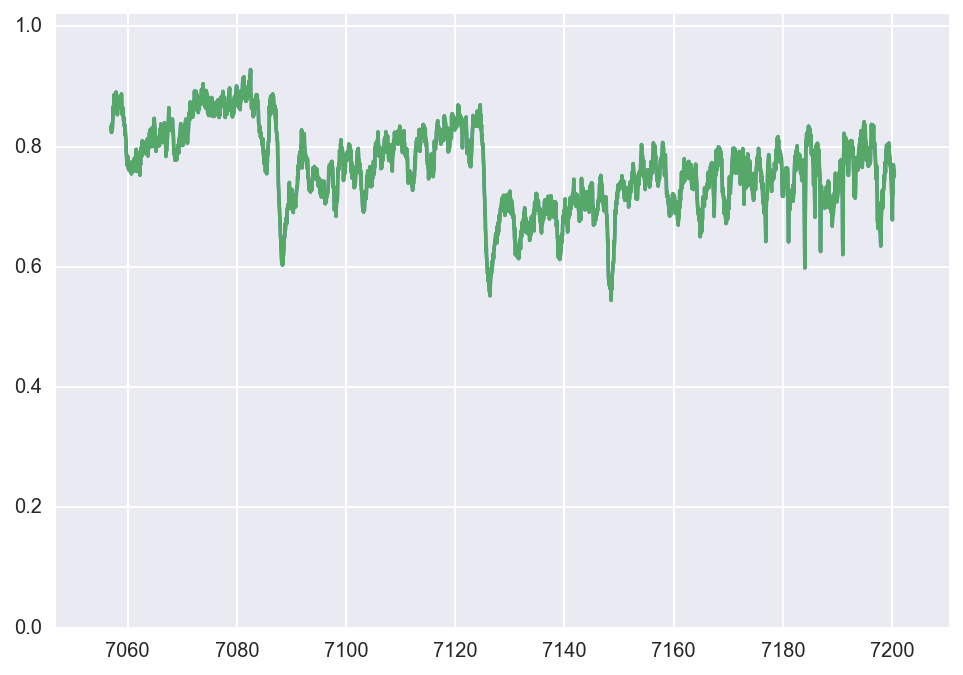

In [73]:
plt.plot(d1.wl_A, d1.flux)
plt.plot(orig_wl, orig_fl)
plt.xlim(orig_wl[0]-10, orig_wl[-1]+10);
plt.ylim(0, orig_fl.max()*1.1);

Woohoo, we have a match!  The spectrum I had been using for the last half year is: **lkca4_10jan14.dat**

This spectrum has an estimated $V-$band magnitude at the time of optical spectrum observation of $\hat V = 12.90$, whereas the IGRINS spectrum has $\hat V = 12.83$

## The End.